### Geomedian Sentinel 2 to Geotiff
Created by Amos Bennett.<br>
Last Updated 12 Jun 20.

In [1]:
%matplotlib inline

import datacube
from datacube_stats.statistics import GeoMedian
from datacube.helpers import write_geotiff
from odc.ui import with_ui_cbk
import sys

sys.path.append("../Scripts")
from dea_datahandling import load_ard
from dea_plotting import display_map
from dea_plotting import rgb

In [ ]:
print(datacube.__version__)

In [2]:
dc = datacube.Datacube(app="beaudesert_s2")

In [3]:
# Set the central latitude and longitude

central_lat = -28.0
central_lon = 153.0

# Set the buffer to load around the central coordinates - max 0.1 deg
buffer = 0.275

# Compute the bounding box for the study area
study_area_lat = (central_lat - buffer, central_lat + buffer)
study_area_lon = (central_lon - buffer, central_lon + buffer)

In [4]:
display_map(x=study_area_lon, y=study_area_lat)

In [5]:
# Create a query object
query = {
    "x": (central_lon - buffer, central_lon + buffer),
    "y": (central_lat - buffer, central_lat + buffer),
    "time": ("2016-01-01", "2016-05-01"),
    "measurements": [
        "nbart_blue",
        "nbart_green",
        "nbart_red",
        "nbart_nir_1",
        "nbart_nir_2",
        "nbart_swir_2",
        "nbart_swir_3",
    ],
    "output_crs": "EPSG:32756",
    "resolution": (-30, 30),
    "group_by": "solar_day",
}

# Load available data
ds = load_ard(
    dc=dc,
    products=["s2a_ard_granule", "s2b_ard_granule"],
    # lazy_load = True,
    # dask_chunks = {'x':1000, 'y':1000},
    **query
)

Loading s2a_ard_granule data
    Applying pixel quality mask
Loading s2b_ard_granule data
    No data for s2b_ard_granule
Combining and sorting data
Masking out invalid values
    Returning 17 observations 


In [6]:
print(ds)

<xarray.Dataset>
Dimensions:       (time: 17, x: 1808, y: 2032)
Coordinates:
  * y             (y) float64 6.933e+06 6.933e+06 ... 6.872e+06 6.872e+06
  * x             (x) float64 4.729e+05 4.729e+05 ... 5.271e+05 5.271e+05
  * time          (time) datetime64[ns] 2016-01-01T00:09:15.704000 ... 2016-04-30T00:02:29.672000
Data variables:
    nbart_blue    (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan
    nbart_green   (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan
    nbart_red     (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan
    nbart_nir_1   (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan
    nbart_nir_2   (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan
    nbart_swir_2  (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan
    nbart_swir_3  (time, y, x) float32 nan nan nan nan nan ... nan nan nan nan
Attributes:
    crs:      EPSG:32756


In [7]:
# Compute geomedian using all observations in the dataset
geomedian = GeoMedian().compute(ds)

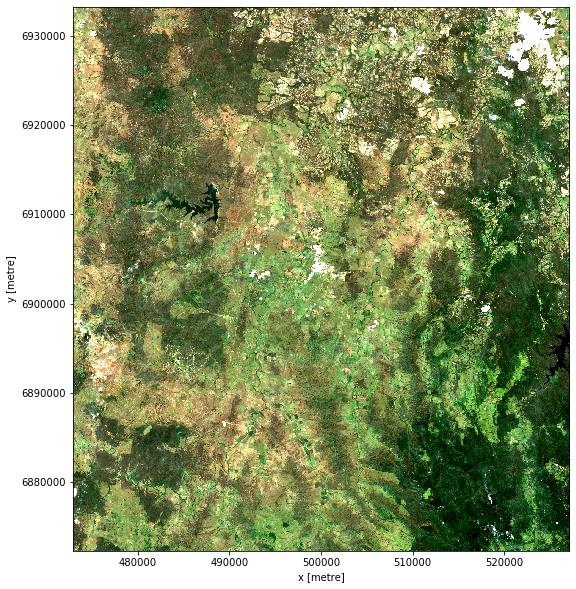

In [44]:
# Plot the result
rgb(geomedian, size=10)

In [45]:
import datetime

write_geotiff('{datetime.datetime.now():%Y%m%d}_Beaudesert_Sentinel_Geomedian.tif', geomedian)